In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [5]:
df = pd.read_excel(r'C:\Users\Sherry\Downloads\flatten_data_table-main\flatten_data_table-main\wikipedia_dataset_flat.xlsx')

In [6]:
print (df.head())

   Unnamed: 0       date                                               page  \
0           0 2016-01-01        .xxx_en.wikipedia.org_all-access_all-agents   
1           1 2016-01-01        .xxx_en.wikipedia.org_mobile-web_all-agents   
2           2 2016-01-01        1._Juli_de.wikipedia.org_desktop_all-agents   
3           3 2016-01-01  2014_FIFA_World_Cup_en.wikipedia.org_all-acces...   
4           4 2016-01-01  2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...   

   visits  
0  7089.0  
1  6182.0  
2    20.0  
3  5363.0  
4  3186.0  


In [6]:
df.isnull()

,Unnamed: 0,date,page,visits
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
548995,False,False,False,False
548996,False,False,False,False
548997,False,False,False,False
548998,False,False,False,False


In [7]:
df.isnull().sum()

Unnamed: 0     0
date           0
page           0
visits        87
dtype: int64

In [9]:
df= df.dropna()
print(df)

        Unnamed: 0       date  \
0                0 2016-01-01   
1                1 2016-01-01   
2                2 2016-01-01   
3                3 2016-01-01   
4                4 2016-01-01   
...            ...        ...   
548995      548995 2016-12-31   
548996      548996 2016-12-31   
548997      548997 2016-12-31   
548998      548998 2016-12-31   
548999      548999 2016-12-31   

                                                     page   visits  
0             .xxx_en.wikipedia.org_all-access_all-agents   7089.0  
1             .xxx_en.wikipedia.org_mobile-web_all-agents   6182.0  
2             1._Juli_de.wikipedia.org_desktop_all-agents     20.0  
3       2014_FIFA_World_Cup_en.wikipedia.org_all-acces...   5363.0  
4       2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...   3186.0  
...                                                   ...      ...  
548995   Zac_Efron_en.wikipedia.org_all-access_all-agents  13146.0  
548996  Zayn_Malik_en.wikipedia.org_all-access_all-

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548913 entries, 0 to 548999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  548913 non-null  int64         
 1   date        548913 non-null  datetime64[ns]
 2   page        548913 non-null  object        
 3   visits      548913 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 20.9+ MB


In [11]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548913 entries, 0 to 548999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  548913 non-null  int64         
 1   date        548913 non-null  datetime64[ns]
 2   page        548913 non-null  object        
 3   visits      548913 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 20.9+ MB


In [16]:
df.columns

Index(['Unnamed: 0', 'date', 'page', 'visits'], dtype='object')

In [38]:
#dropping the unnamed column
df1 =df.drop(['Unnamed: 0'], axis = 1)
df1

,date,page,visits
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0
...,...,...,...
548995,2016-12-31,Zac_Efron_en.wikipedia.org_all-access_all-agents,13146.0
548996,2016-12-31,Zayn_Malik_en.wikipedia.org_all-access_all-agents,12597.0
548997,2016-12-31,Zendaya_en.wikipedia.org_all-access_all-agents,6217.0
548998,2016-12-31,Zendaya_en.wikipedia.org_mobile-web_all-agents,4650.0


In [31]:
df1.dtypes

date               datetime64[ns]
page                       object
visits                    float64
day_of_the_week            object
dtype: object

In [32]:
df1.shape

(549000, 4)

In [39]:
#converting the date column to dataframe
df1['date'] = pd.to_datetime(df1['date'], format = '%Y-%m-%d %H:%M')
df1.head()

,date,page,visits
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0


In [49]:
df1['day_of_the_week'] = df1['date'].apply(lambda time : time.dayofweek)

In [50]:
#creating a new column with days
df1['day_of_the_week']=pd.DatetimeIndex(df1['date']).day_name()
df1.head()

,date,page,visits,day_of_the_week
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0,Friday
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0,Friday
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0,Friday
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0,Friday
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0,Friday


# Which day(s) of the week is /are the most/least popular for visiting wikipedia?

In [43]:
#count of days of the week in the dataset
df1['day_of_the_week'].value_counts().sort_index(ascending = False)

Wednesday    78000
Tuesday      78000
Thursday     78000
Sunday       78000
Saturday     79500
Monday       78000
Friday       79500
Name: day_of_the_week, dtype: int64

In [44]:
#counting the exact number of visits on different days.
day_visits = df1.groupby('day_of_the_week').sum().sort_values('visits', ascending = False)
day_visits = day_visits[['visits']]
day_visits.reset_index(inplace= True)
day_visits

,day_of_the_week,visits
0,Monday,4.904875e+09
1,Tuesday,4.756254e+09
2,Wednesday,4.676263e+09
3,Thursday,4.571745e+09
4,Sunday,4.551448e+09
5,Saturday,4.470286e+09
6,Friday,4.409638e+09


Text(0, 0.5, 'Visits')

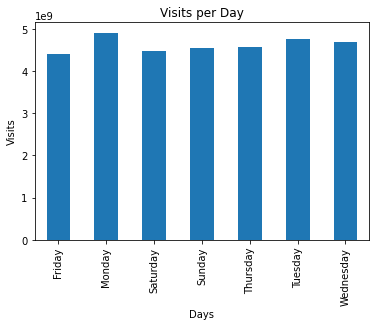

In [45]:
#plot of the number of visits per day
df1.groupby('day_of_the_week')['visits'].sum().plot(kind='bar', title = 'Visits per Day')
plt.xlabel('Days')
plt.ylabel('Visits')

# The analysis shows that Mondays experience the highest number of visits, while Fridays experience the least number of visits.

# To get the proportion and count of different languages in the dataset;

In [68]:
#to check the languages used in this dataset,
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

df1['lang'] = df1.page.map(get_language)

from collections import Counter

print(Counter(df1.lang))

Counter({'en': 418338, 'ja': 44286, 'es': 28914, 'de': 14274, 'ru': 13176, 'fr': 12444, 'zh': 11346, 'na': 6222})


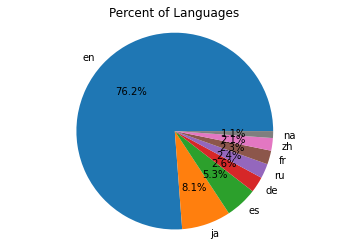

In [71]:
# to get the proportion of languages:
data= [418338,44286,28914,14274,13176,12444,11346,6222]
labels1 = 'en','ja','es','de','ru','fr','zh','na'
plt.pie(data,labels=labels1,autopct='%1.1f%%')
plt.title('Percent of Languages')
plt.axis('equal')
plt.show()

# from the above, English is the most common language used for the searches, followed by japanese and Spanish in third place.